# Preprocessing Task

- نفس عميق كوبايه شاي لان التاسك محتاجه مهندس بجد 
- هتلاقيني سايبلك الخرج بتاع كل سيل عشان لو عاوز تشيك علي حلك او تعرف الخرج بتاع كودك المفروض  شكله يبقي عامل ازاي 
- لو كودك صح ومطلع نتيجه مختلفه عن اللي انا مطلعها هراعي دا لا تقلق بس دي نادرا تحصل بس لو حصلت هيبقي خفيف وهراعي دا 
- التاسك دي هتنمي فيك مهاره السيرش يعني هتنميها ملهاش حل تاني 
### يلا بالتوفيق 

# Importing


In [ ]:
# Import Needed Libraries
import pandas as pd
from scipy.stats import skew
import numpy as np


In [66]:
# Read data and show first 5 rows 
data = pd.read_csv("house_prices.csv")
data.head(5)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [67]:
# Data Shape ?
print(data.shape)

(1460, 81)


In [68]:
# Data Info (Data Type of Each column) ?
print(data.info)

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

# Handle Null Values

In [70]:
# what the number of Numurical and Categorical Columns ?
Num_cols = data.select_dtypes(include=['number']).columns
Cat_cols =data.select_dtypes(include=['category','object']).columns
print(f"#Num_cols {len(Num_cols)}")
print(f"#Cat_cols {len(Cat_cols)}")

#Num_cols 38
#Cat_cols 43


- <b> features to be removed ---> 80%  is nan 
- <b> features to filled --------> less than 80 % 
- <b> observation to be removed --> less than 3% 

In [85]:
# Function to clean data based on null values
# Drop features with 80% or higher null values
# Fill null values with mean if null count is > 3% and < 80%
# Remove rows if null count is < 3%
def clean_data(data):
    null_counts = data.isnull().sum()
    null_percentage = data.isnull().mean() * 100

    # Drop columns with 80% or more null values
    dropped_features = null_counts[null_percentage >= 80].index
    data = data.drop(columns=dropped_features)

    # Fill null values by mean if null count is > 3% and < 80%
    for col in data.columns:
        if null_percentage[col] > 3 and null_percentage[col] < 80 and pd.api.types.is_numeric_dtype(data[col]):
            data[col].fillna(data[col].mean(), inplace=True)

    # Remove rows containing null values if null count is < 3%
    rows_with_few_nulls = null_counts[null_percentage < 3].index
    data = data.dropna(subset=rows_with_few_nulls)


    summary = pd.DataFrame({
        'count': null_counts[null_counts > 0]
    }).sort_values(by='count', ascending=False)


    print(summary)

    return data
cleaned_data = clean_data(data)
print(cleaned_data)


              count
PoolQC         1453
MiscFeature    1406
Fence          1179
MasVnrType      872
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
Electrical        1
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   

C:\Users\sky\AppData\Local\Temp\ipykernel_3288\2872652519.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


# Redundant Handling

### Automated function for both categorical and numircal data

In [90]:
# write function to calculate the most redundant value in each column how many it repeated ?
def most_redundant_values(data):
    for col in data.columns:
        most_common = data[col].mode()[0]
        count = data[col].value_counts()[most_common]
        print(f'{col}:  {count} ')

most_redundant = most_redundant_values(data)
print(most_redundant)

Id:  1 
MSSubClass:  536 
MSZoning:  1151 
LotFrontage:  259 
LotArea:  25 
Street:  1454 
LotShape:  925 
LandContour:  1311 
Utilities:  1459 
LotConfig:  1052 
LandSlope:  1382 
Neighborhood:  225 
Condition1:  1260 
Condition2:  1445 
BldgType:  1220 
HouseStyle:  726 
OverallQual:  397 
OverallCond:  821 
YearBuilt:  67 
YearRemodAdd:  178 
RoofStyle:  1141 
RoofMatl:  1434 
Exterior1st:  515 
Exterior2nd:  504 
MasVnrType:  445 
MasVnrArea:  861 
ExterQual:  906 
ExterCond:  1282 
Foundation:  647 
BsmtQual:  649 
BsmtCond:  1311 
BsmtExposure:  953 
BsmtFinType1:  430 
BsmtFinSF1:  467 
BsmtFinType2:  1256 
BsmtFinSF2:  1293 
BsmtUnfSF:  118 
TotalBsmtSF:  37 
Heating:  1428 
HeatingQC:  741 
CentralAir:  1365 
Electrical:  1334 
1stFlrSF:  25 
2ndFlrSF:  829 
LowQualFinSF:  1434 
GrLivArea:  22 
BsmtFullBath:  856 
BsmtHalfBath:  1378 
FullBath:  768 
HalfBath:  913 
BedroomAbvGr:  804 
KitchenAbvGr:  1392 
KitchenQual:  735 
TotRmsAbvGrd:  402 
Functional:  1360 
Fireplaces:  

In [ ]:
# if it repeated more than or equal 80% from data rows count remove the feature 
# Data row count = data.shape[0]
def most_redundant_values(data):
    redundant_values = {}
    row_count = data.shape[0]
    columns_to_drop = []

    for col in data.columns:
        most_common = data[col].mode()[0]
        count = data[col].value_counts()[most_common]
        
        if count >= 0.8 * row_count:  
            columns_to_drop.append(col)
        else:
            redundant_values[col] = count
        
        print(f'{col}: {count}')

    # Drop columns 
    data = data.drop(columns=columns_to_drop)
    print(columns_to_drop)

    return redundant_values

most_redundant = most_redundant_values(data)
print( most_redundant)


Id: 1
MSSubClass: 536
MSZoning: 1151
LotFrontage: 259
LotArea: 25
Street: 1454
LotShape: 925
LandContour: 1311
Utilities: 1459
LotConfig: 1052
LandSlope: 1382
Neighborhood: 225
Condition1: 1260
Condition2: 1445
BldgType: 1220
HouseStyle: 726
OverallQual: 397
OverallCond: 821
YearBuilt: 67
YearRemodAdd: 178
RoofStyle: 1141
RoofMatl: 1434
Exterior1st: 515
Exterior2nd: 504
MasVnrType: 445
MasVnrArea: 861
ExterQual: 906
ExterCond: 1282
Foundation: 647
BsmtQual: 649
BsmtCond: 1311
BsmtExposure: 953
BsmtFinType1: 430
BsmtFinSF1: 467
BsmtFinType2: 1256
BsmtFinSF2: 1293
BsmtUnfSF: 118
TotalBsmtSF: 37
Heating: 1428
HeatingQC: 741
CentralAir: 1365
Electrical: 1334
1stFlrSF: 25
2ndFlrSF: 829
LowQualFinSF: 1434
GrLivArea: 22
BsmtFullBath: 856
BsmtHalfBath: 1378
FullBath: 768
HalfBath: 913
BedroomAbvGr: 804
KitchenAbvGr: 1392
KitchenQual: 735
TotRmsAbvGrd: 402
Functional: 1360
Fireplaces: 690
FireplaceQu: 380
GarageType: 870
GarageYrBlt: 65
GarageFinish: 605
GarageCars: 824
GarageArea: 81
GarageQua

# Handling correlation between features

In [96]:
#calculate the correlation matrix  (note the correlation matrix just only for numirical features )
correlation_matrix = data.select_dtypes(include=['number']).corr()
print(correlation_matrix)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.009601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.357056 -0.139781     0.032628   
LotFrontage   -0.009601   -0.357056     1.000000  0.306795     0.234196   
LotArea       -0.033226   -0.139781     0.306795  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.234196  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.052820 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.117598  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.082746  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.179700  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.215828  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.043340  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.122156 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

#### If we have 2 highly correlated features (corr > 0.7), we drop one of them (the variable which is less correlated to the response variable (Output column) )

In [103]:
def remove_highly_correlated(data, threshold=0.7):
    correlation_matrix = data.select_dtypes(include=['number']).corr()
    correlation_to_drop = set()

    for col in correlation_matrix.columns:
        for row in correlation_matrix.index:
            if col != row and abs(correlation_matrix.loc[row, col]) > threshold:
                correlation_to_drop.add(col)

    print('the columns are droped are:', correlation_to_drop)  
    data = data.drop(columns=correlation_to_drop)

    return data

correlation_dropped = remove_highly_correlated(data)

the columns are droped are: {'GarageYrBlt', 'SalePrice', 'GarageArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'OverallQual'}


# Handling Outliers 
- lower band = q1 - (1.5*IQR)
- Upper band = q3 + (1.5*IQR)

In [106]:
# Write function to remove Outliers that above Upper band or below lower band for each column 
def remove_Quartiles(data):
    for col in data.select_dtypes(include=['number']).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_band = Q1 - 1.5 * IQR
        upper_band = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_band) & (data[col] <= upper_band)]
    return data

    
remove = remove_Quartiles(data)
print(remove)


    




    
    

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
6        7          20       RL         75.0    10084   Pave      Reg   
10      11          20       RL         70.0    11200   Pave      Reg   
...    ...         ...      ...          ...      ...    ...      ...   
1444  1445          20       RL         63.0     8500   Pave      Reg   
1448  1449          50       RL         70.0    11767   Pave      Reg   
1451  1452          20       RL         78.0     9262   Pave      Reg   
1454  1455          20       FV         62.0     7500   Pave      Reg   
1455  1456          60       RL         62.0     7917   Pave      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...   

# Skewness Handling
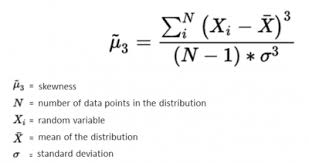


In [112]:
# write function to calc the skewness of each feature
#Note  N = train_data.shape[0]  (rows count)
def cal_skewness( data ):
    skewness = {}
    N =  data.shape[0]
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            mean = data[column].mean()
            std = data[column].std()
            if std != 0:  
                skew = ((data[column] - mean) ** 3).sum() / ((N - 1) * (std ** 3))
                skewness[column] = skew
            else:
                skewness[column] = 0
        else:
            skewness[column] = 0
                
    return skewness       
skew_values = cal_skewness(data)
for key, value in skew_values.items():
    print(f"'{key}': {value},") 

'Id': 0.0,
'MSSubClass': 1.4057284502356557,
'MSZoning': 0,
'LotFrontage': 2.3816831129182137,
'LotArea': 12.190964991163314,
'Street': 0,
'LotShape': 0,
'LandContour': 0,
'Utilities': 0,
'LotConfig': 0,
'LandSlope': 0,
'Neighborhood': 0,
'Condition1': 0,
'Condition2': 0,
'BldgType': 0,
'HouseStyle': 0,
'OverallQual': 0.21664674430018052,
'OverallCond': 0.6921180649876648,
'YearBuilt': -0.6126208147176514,
'YearRemodAdd': -0.5028721917378675,
'RoofStyle': 0,
'RoofMatl': 0,
'Exterior1st': 0,
'Exterior2nd': 0,
'MasVnrType': 0,
'MasVnrArea': 2.65079280121967,
'ExterQual': 0,
'ExterCond': 0,
'Foundation': 0,
'BsmtQual': 0,
'BsmtCond': 0,
'BsmtExposure': 0,
'BsmtFinType1': 0,
'BsmtFinSF1': 1.6831941635931031,
'BsmtFinType2': 0,
'BsmtFinSF2': 4.249431984126547,
'BsmtUnfSF': 0.9190078110877341,
'TotalBsmtSF': 1.5221665291325435,
'Heating': 0,
'HeatingQC': 0,
'CentralAir': 0,
'Electrical': 0,
'1stFlrSF': 1.3748706540582474,
'2ndFlrSF': 0.8119160768279395,
'LowQualFinSF': 8.998996985330503,
'Gr

# Log Transformation
> X = log(1 + | X | )     
this is the equation 

In [117]:
# Features that have absolute skewness > 1 do for it Log tranformation 
def log_transform_skewed_features(data, skew_values):
    skewed_features = [key for key, value in skew_values.items() if abs(value) > 1]

    
    for feature in skewed_features:
        data[feature] = np.log1p(data[feature]) 
    print("Features is log_Transformed:")
    for feature in skewed_features:
        print(feature)
    return data
skew_values = cal_skewness(data)
train_data = log_transform_skewed_features(data, skew_values)

Features is log_Transformed:
BsmtFinSF2
TotalBsmtSF
LowQualFinSF
BsmtHalfBath
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal


# Transform categorical features 

In [126]:
# cat_cols ordinal or nominal?
ordinal_cats = ['BsmtQual', 'LotShape', 'HeatingQC', 'BsmtFinType1',  'ExterQual', 
                 'KitchenQual', 'BsmtExposure', 'GarageFinish']
nominal_cats = ['HouseStyle', 'LotConfig', 'RoofStyle', 'GarageType', 'Exterior1st', 
                'Foundation', 'MSZoning', 'Exterior2nd', 'Neighborhood','FireplaceQu']

In [129]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Encode ordinal features
def encode_ordinal_features(data, ordinal_cols):
    for col in ordinal_cols:
        data[col] = LabelEncoder().fit_transform(data[col].astype(str))
    return data

# Encode nominal features
def encode_nominal_features(data, nominal_cols):
    ohe = OneHotEncoder(sparse_output=False, drop='first')
    nominal_df = pd.DataFrame(ohe.fit_transform(data[nominal_cols]),
                              columns=ohe.get_feature_names_out(nominal_cols),
                              index=data.index)
    data = data.drop(nominal_cols, axis=1).join(nominal_df)
    return data


data = encode_ordinal_features(data, ordinal_cats)
data = encode_nominal_features(data, nominal_cats)


print("Encoded data:")
print(data.head())

# سيرشك الجميل بقي وشوف كل واحد بيطلع ايه وازاي هتلم الداتا بتاعتك معلش هتعبك معانا يا جميل 

Encoded data:
   Id  MSSubClass  LotFrontage   LotArea Street  LotShape LandContour  \
0   1    4.110874     4.189655  9.042040   Pave         3         Lvl   
1   2    3.044522     4.394449  9.169623   Pave         3         Lvl   
2   3    4.110874     4.234107  9.328212   Pave         0         Lvl   
3   4    4.262680     4.110874  9.164401   Pave         0         Lvl   
4   5    4.110874     4.442651  9.565284   Pave         0         Lvl   

  Utilities LandSlope Condition1  ... Neighborhood_SawyerW  \
0    AllPub       Gtl       Norm  ...                  0.0   
1    AllPub       Gtl      Feedr  ...                  0.0   
2    AllPub       Gtl       Norm  ...                  0.0   
3    AllPub       Gtl       Norm  ...                  0.0   
4    AllPub       Gtl       Norm  ...                  0.0   

  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                  0.0                   0.0                  0.0   
1                  0.0              

# Transform Numerical features 
> I want you apply only Min-Max Scaling for all numerical columns

In [130]:
from sklearn.preprocessing import MinMaxScaler

# write code here 
def scale_numerical_features(data):
    scaler = MinMaxScaler()
    num_cols = data.select_dtypes(include=['number']).columns
    data[num_cols] = scaler.fit_transform(data[num_cols])
    return data
data = scale_numerical_features(data)

print("Scaled numerical features:")
print(data.head())



Scaled numerical features:
         Id  MSSubClass  LotFrontage   LotArea Street  LotShape LandContour  \
0  0.000000    0.483003     0.413268  0.366271   Pave       1.0         Lvl   
1  0.000685    0.000000     0.490307  0.391245   Pave       1.0         Lvl   
2  0.001371    0.483003     0.429990  0.422289   Pave       0.0         Lvl   
3  0.002056    0.551764     0.383633  0.390223   Pave       0.0         Lvl   
4  0.002742    0.483003     0.508439  0.468694   Pave       0.0         Lvl   

  Utilities LandSlope Condition1  ... Neighborhood_SawyerW  \
0    AllPub       Gtl       Norm  ...                  0.0   
1    AllPub       Gtl      Feedr  ...                  0.0   
2    AllPub       Gtl       Norm  ...                  0.0   
3    AllPub       Gtl       Norm  ...                  0.0   
4    AllPub       Gtl       Norm  ...                  0.0   

  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                  0.0                   0.0            

In [135]:
# print Your final data frame here 
print(data.head(10))


         Id  MSSubClass  LotFrontage   LotArea Street  LotShape LandContour  \
0  0.000000    0.483003     0.413268  0.366271   Pave       1.0         Lvl   
1  0.000685    0.000000     0.490307  0.391245   Pave       1.0         Lvl   
2  0.001371    0.483003     0.429990  0.422289   Pave       0.0         Lvl   
3  0.002056    0.551764     0.383633  0.390223   Pave       0.0         Lvl   
4  0.002742    0.483003     0.508439  0.468694   Pave       0.0         Lvl   
5  0.003427    0.401904     0.512839  0.466694   Pave       0.0         Lvl   
6  0.004112    0.000000     0.466338  0.400872   Pave       1.0         Lvl   
7  0.004798    0.483003     0.441003  0.406573   Pave       0.0         Lvl   
8  0.005483    0.401904     0.323585  0.303132   Pave       1.0         Lvl   
9  0.006169    1.000000     0.316280  0.340830   Pave       1.0         Lvl   

  Utilities LandSlope Condition1  ... Neighborhood_SawyerW  \
0    AllPub       Gtl       Norm  ...                  0.0   
1    A

## End 
## لو وصلت لهنا بالسلامه تبقي تنين وتاخد 5 بونص و5 كمان لو كان حلك كله تمام 